# サイモンのアルゴリズム

このセクションでは、まずサイモン問題と、それを解決するための古典アルゴリズムと量子アルゴリズムを紹介します。次に、Qiskit を使用して量子アルゴリズムを実装し、シミュレーターとデバイス上で実行します。

## 1. はじめに<a id="introduction"></a>

参考文献 [1] で最初に紹介された Simon のアルゴリズムは、特定の問題を解決する際に最高の古典的アルゴリズムと比較して指数関数的な高速化を示した最初の量子アルゴリズムでした。これは、最も有名な量子アルゴリズムであるショールの因数分解アルゴリズムで使用される量子フーリエ変換に基づく量子アルゴリズムにインスピレーションを与えました。

### 1a.サイモンの問題<a id="problem"> </a>

未知のブラックボックス関数 $f$ が与えられますが、これは 1 対 1 ($1:1$) または 2 対 1 ($2:1$) のいずれかであることが保証されています。 to-one 関数には次のプロパティがあります。

- **one-to-one** : すべての入力に対して 1 つの一意の出力を正確にマッピングします。 4 つの入力を取る関数の例は次のとおりです。

$$f(1) \rightarrow 1, \quad f(2) \rightarrow 2, \quad f(3) \rightarrow 3, \quad f(4) \rightarrow 4$$

- **two-to-one** : 正確に 2 つの入力をすべての一意の出力にマッピングします。 4 つの入力を取る関数の例は次のとおりです。

$$f(1) \rightarrow 1, \quad f(2) \rightarrow 2, \quad f(3) \rightarrow 1, \quad f(4) \rightarrow 2$$

この 2 対 1 マッピングは、隠しビット文字列 $b$ に従っています。ここで、

$$
\textrm{given }x_1,x_2: \quad f(x_1) = f(x_2) \\
\textrm{it is guaranteed }: \quad x_1 \oplus x_2 = b
$$

このブラックボックス $f$ が与えられた場合、$f$ が 1 対 1 か 2 対 1 かをどれだけ早く判断できるでしょうか?それでは、$f$ が 2 対 1 であることが判明した場合、どれくらい早く $b$ を決定できるでしょうか?結局のところ、どちらの場合も、$b={000...}$ のビット文字列が 1 対 1 の $f$ を表す $b$ を見つけるという同じ問題に帰着します。

### 1b.サイモンのアルゴリズム<a id="algorithm"> </a>

#### 古典的な解決策

古典的に、与えられた $f$ に対して $b$ が何であるかを 100% の確実性で知りたい場合は、最大 $2^{n−1}+1$ の入力をチェックする必要があります。ここで、n はビット数です。入力。これは、同じ出力の 2 つのケースが見つかるまで、考えられるすべての入力の半分強をチェックすることを意味します。ドイチュ・ジョッサ問題と同じように、運が良ければ最初の 2 回の試行で問題を解決できるかもしれません。しかし、たまたま 1 対 1 の $f$ を取得した場合、または*非常に*運悪く 2 対 1 の $f$ を取得した場合、完全な $2^{n−1}+ で立ち往生することになります。 1ドル。 $\Omega(2^{n/2})$ の下限を持つ既知のアルゴリズムがあります (下記参考文献 2 を参照) が、一般に、複雑さは n とともに指数関数的に増加します。

#### 量子ソリューション

Simon のアルゴリズムを実装する量子回路を以下に示します。

![画像1](images/simon_steps.png)

ここで、クエリ関数 $\text{Q}_f$ は 2 つの量子レジスタに対して次のように動作します。

$$ \lvert x \rangle \lvert a \rangle \rightarrow \lvert x \rangle \lvert a \oplus f(x) \rangle $$

2 番目のレジスタが $|0\rangle = |00\dots0\rangle$ 状態にある特定のケースでは、次のようになります。

$$ \lvert x \rangle \lvert 0 \rangle \rightarrow \lvert x \rangle \lvert f(x) \rangle $$

アルゴリズムには次の手順が含まれます。

1. 2 つの $n$-qubit 入力レジスタはゼロ状態に初期化されます。

    $$\lvert \psi_1 \rangle = \lvert 0 \rangle^{\otimes n} \lvert 0 \rangle^{\otimes n} $$

2. アダマール変換を最初のレジスタに適用します。

    $$\lvert \psi_2 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle\lvert 0 \rangle^{\otimes n}  $$

3. クエリ関数 $\text{Q}_f$ を適用します。

    $$ \lvert \psi_3 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle \lvert f(x) \rangle $$

4. 2 番目のレジスターを測定します。 $f(x)$ の特定の値が観察されます。問題の設定により、観測値 $f(x)$ は 2 つの可能な入力、$x$ と $y = x \oplus b $ に対応する可能性があります。したがって、最初のレジスタは次のようになります。

    $$\lvert \psi_4 \rangle = \frac{1}{\sqrt{2}}  \left( \lvert x \rangle + \lvert y \rangle \right)$$

    ここで、2 番目のレジスタは測定済みであるため省略しました。

5. 最初のレジスターにアダマールを適用します。

    $$ \lvert \psi_5 \rangle = \frac{1}{\sqrt{2^{n+1}}} \sum_{z \in \{0,1\}^{n} } \left[  (-1)^{x \cdot z} + (-1)^{y \cdot z} \right]  \lvert z \rangle  $$

6. 最初のレジスタを測定すると、次の場合にのみ出力が得られます。

    $$ (-1)^{x \cdot z} = (-1)^{y \cdot z} $$これは次のことを意味します。

    $$
       x \cdot z = y \cdot z \\
       x \cdot z = \left( x \oplus b \right) \cdot z \\
       x \cdot z = x \cdot z \oplus b \cdot z \\
       b \cdot z = 0 \text{ (mod 2)}
       $$

    文字列 $z$ が測定され、その内積 $b = 0$ が求められます。したがって、アルゴリズムを $\estimate n$ 回繰り返すと、$z$ の $n$ 個の異なる値を取得できるようになり、次の連立方程式を書くことができます。

    $$ \begin{cases} b \cdot z_1 = 0 \\ b \cdot z_2 = 0 \\ \quad \vdots \\ b \cdot z_n = 0 \end{cases}$$

    $b$ は、たとえばガウス消去法によって決定できます。

したがって、この特定の問題では、量子アルゴリズムは古典的なアルゴリズムよりも指数関数的に少ないステップを実行します。繰り返しになりますが、このアルゴリズムの応用を想像するのは難しいかもしれません (ただし、これはショールによって作成された最も有名なアルゴリズムに影響を与えました) が、量子を使用することで特定の問題を解決する際に指数関数的に高速化できるという最初の証拠となります。古典的なコンピューターではなくコンピューター。

## 2. 例<a id="example"></a>

$y = x \oplus b$ の場合、$f(x) = f(y)$ となる、秘密文字列 $b=11$ を使用した 2 量子ビットに対する Simon のアルゴリズムの例を見てみましょう。この問題を解決するための量子回路は次のとおりです。

![画像2](images/simon_example.png)

1. 2 つの $2$-qubit 入力レジスタはゼロ状態に初期化されます。

    $$\lvert \psi_1 \rangle = \lvert 0 0 \rangle_1 \lvert 0 0 \rangle_2 $$

2. 最初のレジスタの量子ビットにアダマール ゲートを適用します。

    $$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle_1 + \lvert 0 1 \rangle_1 + \lvert 1 0 \rangle_1 + \lvert 1 1 \rangle_1 \right) \lvert 0 0 \rangle_2 $$

3. 文字列 $b=11$ の場合、クエリ関数`$\text{Q}_f = CX_{1_a 2_a}CX_{1_a 2_b}CX_{1_b 2_a}CX_{1_b 2_b}$`実装できます (上の回路図):

    $$
       \begin{aligned}
       \lvert \psi_3 \rangle  = \frac{1}{2} ( \;
         &amp; \lvert 0 0 \rangle_1 \; \lvert 0\oplus 0 \oplus 0, &amp; 0 \oplus 0 \oplus 0 \rangle_2 &amp;\\[5pt]
       + &amp; \lvert 0 1 \rangle_1 \; \lvert 0\oplus 0 \oplus 1, &amp; 0 \oplus 0 \oplus 1 \rangle_2 &amp;\\[6pt]
       + &amp; \lvert 1 0 \rangle_1 \; \lvert 0\oplus 1 \oplus 0, &amp; 0 \oplus 1 \oplus 0 \rangle_2 &amp;\\[6pt]
       + &amp; \lvert 1 1 \rangle_1 \; \lvert 0\oplus 1 \oplus 1, &amp; 0 \oplus 1 \oplus 1 \rangle_2 &amp; \; )\\
       \end{aligned}
       $$

    したがって：

    $$
       \begin{aligned}
       \lvert \psi_3 \rangle = \frac{1}{2} ( \quad
       &amp; \lvert 0 0 \rangle_1  \lvert 0 0 \rangle_2 &amp; \\[6pt]
       + &amp; \lvert 0 1 \rangle_1 \lvert 1  1 \rangle_2 &amp; \\[6pt]
       + &amp; \lvert 1 0 \rangle_1 \lvert  1   1  \rangle_2 &amp; \\[6pt]
       + &amp; \lvert 1 1 \rangle_1 \lvert 0 0 \rangle_2 &amp; \; )\\
       \end{aligned}
       $$

4. 2番目のレジスタを測定します。 $50%$ の確率で、$\lvert 0 0 \rangle_2$ または $\lvert 1 1 \rangle_2$ のいずれかが表示されます。例として、$\lvert 1 1 \rangle_2$ が表示されたと仮定します。システムの状態$$ \lvert \psi_4 \rangle = \frac{1}{\sqrt{2}} \left( \lvert 0 1 \rangle_1 + \lvert 1 0 \rangle_1 \right) $$ 2 番目のレジスタは測定済みなので省略しました。

5. $$ \lvert \psi_5 \rangle = \frac{1}{2\sqrt{2}} \left[ \left( \lvert 0 \rangle + \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right) + \left( \lvert 0 \rangle - \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle + \lvert 1 \rangle \right) \right] \\
= \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle - \lvert 0 1 \rangle + \lvert 1 0 \rangle - \lvert 1 1 \rangle + \lvert 0 0 \rangle + \lvert 0 1 \rangle - \lvert 1 0 \rangle - \lvert 1 1 \rangle \right] \\
= \frac{1}{\sqrt{2}} \left( \lvert 0 0 \rangle - \lvert 1 1 \rangle \right)$$

6. 最初のレジスタを測定すると、等しい確率で $\lvert 0 0 \rangle$ または $\lvert 1 1 \rangle$ が得られます。

7. $\lvert 1 1 \rangle$ が表示された場合、次のようになります。

    $$ b \cdot 11 = 0 $$

    これは $b \neq 01$ または $10$ であることを示しており、残りの 2 つの潜在的な解は $b = 00$ または $b = 11$ であることがわかります。 $b = 00$ は常に連立方程式の自明な解となることに注意してください。手順 1 ～ 6 を何度も繰り返すと、$|00\rangle$ または $|11\rangle$ のみが測定されます。

    GL_FORMULA_7
    GL_FORMULA_8

    $b=11$ を満たす唯一の方程式です。 $b=11$ を検証するには、ランダムな入力 ($x_i$) を選択し、$f(x_i) = f(x_i \oplus b)$ をチェックします。例えば：

    GL_FORMULA_9
    GL_FORMULA_10

## 3. Qiskitの実装<a id="implementation"></a>

ここで、$3$-qubits と $b=110$ を使用した例として、Simon のアルゴリズムを実装します。

In [1]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

関数`simon_oracle` (上記でインポート) は、ビット文字列`b`の Simon oracle を作成します。説明は省略しましたが、その方法については[セクション 4](#oracle)で説明します。

Qiskit では、量子回路の終端でのみ測定が許可されます。 Simon のアルゴリズムの場合、実際には 2 番目のレジスタの出力は気にせず、最初のレジスタのみを測定します。

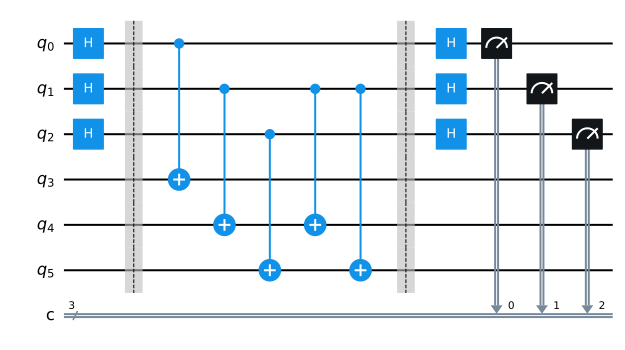

In [3]:
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit = simon_circuit.compose(simon_oracle(b))

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

### 3a.シミュレータを使って実験する<a id="simulation"></a>

上記の回路をシミュレータ上で実行できます。 

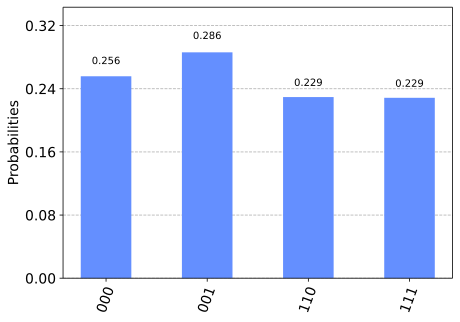

In [5]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(simon_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

$b$ はすでにわかっているので、これらの結果が $b\cdot z = 0 \pmod{2}$ を満たしていることを確認できます。

In [6]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

110.111 = 0 (mod 2)
110.001 = 0 (mod 2)
110.110 = 0 (mod 2)
110.000 = 0 (mod 2)


これらの結果を使用して、この一連の連立方程式を解くことによって $b = 110$ の値を回復できます。たとえば、最初に`001`を測定したとすると、次のようになります。

$$
\require{cancel}
\begin{aligned}
b \cdot 001 &amp;= 0 \\
(b_2 \cdot 0) + (b_1 \cdot 0) + (b_0 \cdot 1) &amp; = 0 \\
(\cancel{b_2 \cdot 0}) + (\cancel{b_1 \cdot 0}) + (b_0 \cdot 1) &amp; = 0 \\
b_0 &amp; = 0\\
\end{aligned}
$$

次に`111`を測定すると、次のようになります。

$$
\require{cancel}
\begin{aligned}
b \cdot 111 &amp;= 0 \\
(b_2 \cdot 1) + (b_1 \cdot 1) + (\cancel{0 \cdot 1}) &amp; = 0 \\
(b_2 \cdot 1) + (b_1 \cdot 1) &amp; = 0 \\
\end{aligned}
$$

これにより、次のいずれかがわかります。

$$ b_2 = b_1 = 0, \quad b = 000 $$

また

$$ b_2 = b_1 = 1, \quad b = 110 $$

このうち $b = 110$ は連立方程式の自明ではない解です。これらの問題は一般に、 $O(n^3)$ の実行時間を持つ[ガウス消去法](https://mathworld.wolfram.com/GaussianElimination.html)を使用して解決できます。

### 3b.実際のデバイスを使って実験する<a id="device"></a>

[セクション 3a](#simulation)の回路は $2n = 6$ 量子ビットを使用しますが、この記事の執筆時点では、多くの IBM Quantum デバイスには 5 量子ビットしかありません。同じコードを実行しますが、代わりにセクション 2 の例のように $b=11$ を使用し、必要な量子ビットは 4 つだけです。

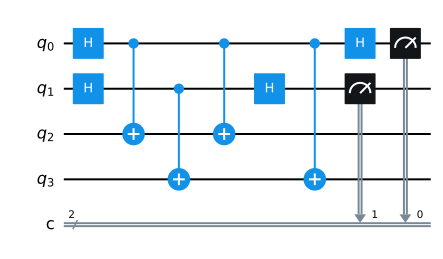

In [7]:
b = '11'
n = len(b)
simon_circuit_2 = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit_2.h(range(n))

# Query oracle
simon_circuit_2 = simon_circuit_2.compose(simon_oracle(b))

# Apply Hadamard gates to the input register
simon_circuit_2.h(range(n))

# Measure qubits
simon_circuit_2.measure(range(n), range(n))
simon_circuit_2.draw()

この回路は[セクション 2](#example)で示した回路とは少し異なります。出力は異なりますが、入力衝突は同じです。つまり、どちらも $f(x) = f(x \oplus 11)$ という性質を持っています。

In [8]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Execute and monitor the job
from qiskit.tools.monitor import job_monitor
shots = 1024
transpiled_simon_circuit = transpile(simon_circuit_2, backend, optimization_level=3)
job = backend.run(transpiled_simon_circuit)
job_monitor(job, interval=2)

least busy backend:  ibmq_belem
Job Status: job has successfully run


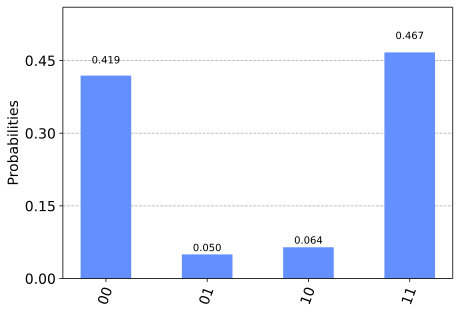

In [9]:
# Get results and plot counts
device_counts = job.result().get_counts()
plot_histogram(device_counts)

In [10]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

print('b = ' + b)
for z in device_counts:
    print( '{}.{} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), device_counts[z]*100/shots))

b = 11
11.00 = 0 (mod 2) (41.9%)
11.01 = 1 (mod 2) (5.0%)
11.10 = 1 (mod 2) (6.4%)
11.11 = 0 (mod 2) (46.7%)


ご覧のとおり、最も重要な結果は $b\cdot z = 0$ (mod 2) の結果です。他の結果は誤りですが、発生する確率は低くなります。誤った結果を測定する可能性が低いと仮定すると、古典的なコンピューターを使用して線形方程式系を解くことによって $b$ の値を回復できます。この $n=2$ の場合、$b = 11$ となります。

## 4. オラクル<a id="oracle"></a>

上記の[例](#example)と Simon のアルゴリズムの[実装は](#implementation)、特に $b$ の特定の値を対象としています。問題を他の秘密ビット列に拡張するには、Simon クエリ関数またはオラクルについてさらに詳しく議論する必要があります。

Simon アルゴリズムは、$y = x \oplus の場合に限り、$f_b(x) = f_b(y)$ を満たすオラクル $f_b$ から、{0,1}^n$ の隠れたビット文字列 $b \in {0,1}^n$ を見つけることを扱います。 {0,1}^n$ 内のすべての $x \ に対して b$。ここで、$\oplus$ はビット単位の XOR 演算です。したがって、$b = 0\ldots 0$、つまりすべてゼロのビット列の場合、$f_b$ は 1 対 1 (または順列) 関数です。それ以外の場合、$b \neq 0\ldots 0$ の場合、$f_b$ は 2 対 1 関数です。

このアルゴリズムでは、オラクルは $|x\rangle|0\rangle$ を入力として受け取ります。所定の $b$ に関して、オラクルは出力を 2 番目のレジスタに書き込み、$f(x) = f(x\ となるように入力を $|x\rangle|f_b(x)\rangle$ に変換します。 {0,1}^n$ 内のすべての $x \ に対して b)$ を加えます。

このようなブラックボックス機能は以下の手順で実現できます。

- 最初のレジスタの内容を 2 番目のレジスタにコピーします。 $$
|x\rangle|0\rangle \rightarrow |x\rangle|x\rangle
$$

- **(1 対 1 または 2 対 1 のマッピングの作成)** $b$ がすべてゼロでない場合、最小のインデックス $j$ が存在するため、$b_j = 1$ になります。 $x_j = 0$ の場合、2 番目のレジスタと $b$ の XOR を計算します。それ以外の場合は、2 番目のレジスタを変更しないでください。 $$
|x\rangle|x\rangle \rightarrow |x\rangle|x \oplus b\rangle~\mbox{if}~x_j = 0~\mbox{for the least index j}
$$

- **(ランダムな置換の作成)** 2 番目のレジスタの量子ビットをランダムに置換して反転します。 $$
|x\rangle|y\rangle \rightarrow |x\rangle|f_b(y)\rangle
$$


## 5. 問題点<a id="problems"></a>

1. Qiskit を使用して一般的な Simon オラクルを実装します。
2. シミュレーターとデバイスで、秘密のビット文字列 $b=1001$ を使用して一般的な Simon オラクルをテストします。結果は期待どおりですか?理由を説明。

## 6. 参考文献<a id="references"></a>

1. ダニエル R. サイモン (1997) 「量子計算の力について」 SIAM Journal on Computing、26(5)、1474–1483、 [doi:10.1137/S0097539796298637](https://doi.org/10.1137/S0097539796298637)
2. 蔡光雅と邱道文。 Simon の問題に対する正確なクエリの複雑さの最適な分離。 Journal of Computer and System Sciences 97: 83-93、2018、 [https://doi.org/10.1016/j.jcss.2018.05.001](https://doi.org/10.1016/j.jcss.2018.05.001)

In [11]:
import qiskit.tools.jupyter
%qiskit_version_table

/usr/local/anaconda3/envs/terra-unstable/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
